In [1]:
import pandas as pd

In [2]:
pdf = pd.read_excel('/Users/liaoyi-ming/Desktop/tcb-metrics.xlsx',
                    sheet_name='Entity.Metrics',
                    index_col=None,)

pdf = pdf.rename(columns=pdf.iloc[2])

In [3]:
pdf = pdf.dropna(axis=0, how='all').drop(2, axis=0)

In [4]:
pdf = pdf.reset_index().drop("index", axis=1)

In [5]:
ddf = pd.DataFrame(pdf)

In [6]:
cols = ddf.columns

col_value = cols.get_loc("Value")

col_metric = cols.get_loc("MetricName")

col_entityname = cols.get_loc("EntityName")

col_eventtime = cols.get_loc("EventTime")

In [7]:
df1 = ddf.iloc[:, col_entityname]

df2 = ddf.iloc[:, col_metric]

df3 = ddf.iloc[:, col_eventtime]

df4 = ddf.iloc[:, col_value]

In [8]:
res1 = df1.join(df2)

In [9]:
res2 = res1.join(df3)

res3 = res2.join(df4)

res = res3

In [417]:
res.to_excel('/Users/liaoyi-ming/Desktop/test.xlsx', index=False)

In [10]:
res

,EntityName,EntityName,EntityName,EntityName,EntityName,EntityName,EntityName,EntityName,EntityName,EntityName,...,Value,Value,Value,Value,Value,Value,Value,Value,Value,Value
0,Web-Portal_Node-01,Web-Portal_Node-01,Web-Portal_Node-01,Web-Portal_Node-01,Web-Portal_Node-01,Web-Portal_Node-01,Web-Portal_Node-01,Web-Portal_Node-01,Web-Portal_Node-01,Web-Portal_Node-01,...,230,7,0,8,18724,7852,200,1,200,59
1,Web-Portal_Node-01,Web-Portal_Node-01,Web-Portal_Node-01,Web-Portal_Node-01,Web-Portal_Node-01,Web-Portal_Node-01,Web-Portal_Node-01,Web-Portal_Node-01,Web-Portal_Node-01,Web-Portal_Node-01,...,266,29,0,8,18655,9318,200,1,200,58
2,Web-Portal_Node-01,Web-Portal_Node-01,Web-Portal_Node-01,Web-Portal_Node-01,Web-Portal_Node-01,Web-Portal_Node-01,Web-Portal_Node-01,Web-Portal_Node-01,Web-Portal_Node-01,Web-Portal_Node-01,...,226,27,0,8,18547,10768,200,1,200,58
3,Web-Portal_Node-01,Web-Portal_Node-01,Web-Portal_Node-01,Web-Portal_Node-01,Web-Portal_Node-01,Web-Portal_Node-01,Web-Portal_Node-01,Web-Portal_Node-01,Web-Portal_Node-01,Web-Portal_Node-01,...,241,29,0,8,561,384,200,1,200,57
4,Web-Portal_Node-01,Web-Portal_Node-01,Web-Portal_Node-01,Web-Portal_Node-01,Web-Portal_Node-01,Web-Portal_Node-01,Web-Portal_Node-01,Web-Portal_Node-01,Web-Portal_Node-01,Web-Portal_Node-01,...,29,9,0,8,1423,16,200,0,200,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,NaN,NaN,NaN,NaN,NaN,NaN,Inventory-Services_Node-01,Inventory-Services_Node-01,Inventory-Services_Node-01,Inventory-Services_Node-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116,NaN,NaN,NaN,NaN,NaN,NaN,Inventory-Services_Node-01,Inventory-Services_Node-01,Inventory-Services_Node-01,Inventory-Services_Node-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117,NaN,NaN,NaN,NaN,NaN,NaN,Inventory-Services_Node-01,Inventory-Services_Node-01,Inventory-Services_Node-01,Inventory-Services_Node-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118,NaN,NaN,NaN,NaN,NaN,NaN,Inventory-Services_Node-01,Inventory-Services_Node-01,Inventory-Services_Node-01,Inventory-Services_Node-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [668]:
step_index = int(len(res.columns) / 4)

import os
 
dir = '/Users/liaoyi-ming/Desktop/tcb_report'
for f in os.listdir(dir):
    os.remove(os.path.join(dir, f))

print(step_index)

for i in range(0, step_index):
    rest = res.iloc[:,i::step_index].to_excel(f'/Users/liaoyi-ming/Desktop/tcb_report/{i+1}.xlsx', sheet_name=f'Sheet_name', index=False)

31


In [19]:
import pandas as pd

import matplotlib.pyplot as plot

fd = pd.read_excel('/Users/liaoyi-ming/Desktop/tcb_report/1.xlsx')
# fd.EventTime = pd.to_datetime(fd['EventTime'], format="%Y-%m-%d")
fd = fd.pivot(index=pd.to_datetime(fd['EventTime'], format="%Y-%m-%d"), columns='EntityName', values='Value')
fd.plot( figsize=(15, 5),grid=True)

KeyError: Timestamp('2022-07-28 00:00:00')

In [313]:
def report_group(dataframe):
    titles = ['EntityName', 'MetricName', 'EventTime', 'Value']
    new_group = []
    for col in dataframe.columns:
        if col in titles:
            new_group.append(col)
            
    return new_group

In [249]:
df = pd.read_excel('/Users/liaoyi-ming/Desktop/tcb-metrics.xlsx', 
                   sheet_name='Entity.Metrics',
                   usecols="C,E,H:I",
                   index_col=False)

pd.set_option('display.max_colwidth', None)

df = df.rename(columns=df.iloc[2])
df

,EntityName,MetricName,EventTime,Value
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,EntityName,MetricName,EventTime,Value
3,Web-Portal_Node-01,Average Response Time (ms),2022-07-28 00:00:00,1043
4,Web-Portal_Node-01,Average Response Time (ms),2022-07-28 01:00:00,1102
...,...,...,...,...
118,NaN,NaN,NaN,NaN
119,NaN,NaN,NaN,NaN
120,NaN,NaN,NaN,NaN
121,NaN,NaN,NaN,NaN


In [250]:
title = df.iloc[3,1]
print(title)

Average Response Time (ms)


In [251]:
df = df.dropna()
df = df.drop([2])

In [252]:
df

,EntityName,MetricName,EventTime,Value
3,Web-Portal_Node-01,Average Response Time (ms),2022-07-28 00:00:00,1043
4,Web-Portal_Node-01,Average Response Time (ms),2022-07-28 01:00:00,1102
5,Web-Portal_Node-01,Average Response Time (ms),2022-07-28 02:00:00,1060
6,Web-Portal_Node-01,Average Response Time (ms),2022-07-28 03:00:00,540
7,Web-Portal_Node-01,Average Response Time (ms),2022-07-28 11:00:00,1821
8,Web-Portal_Node-01,Average Response Time (ms),2022-07-28 12:00:00,10864
9,Web-Portal_Node-01,Average Response Time (ms),2022-07-28 13:00:00,10280
10,Web-Portal_Node-01,Average Response Time (ms),2022-07-28 14:00:00,1355
11,Web-Portal_Node-01,Average Response Time (ms),2022-07-28 15:00:00,943
12,Web-Portal_Node-01,Average Response Time (ms),2022-07-28 16:00:00,1275


In [277]:
df['Value'] = df['Value'].astype('int16')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 3 to 33
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   EntityName  31 non-null     object
 1   MetricName  31 non-null     object
 2   EventTime   31 non-null     object
 3   Value       31 non-null     object
dtypes: object(4)
memory usage: 1.2+ KB


In [7]:
df_group = df.groupby('EntityName')

df_group.head()

,EntityName,MetricName,EventTime,Value
3,Web-Portal_Node-01,Average Response Time (ms),2022-07-28 00:00:00,1043
4,Web-Portal_Node-01,Average Response Time (ms),2022-07-28 01:00:00,1102
5,Web-Portal_Node-01,Average Response Time (ms),2022-07-28 02:00:00,1060
6,Web-Portal_Node-01,Average Response Time (ms),2022-07-28 03:00:00,540
7,Web-Portal_Node-01,Average Response Time (ms),2022-07-28 11:00:00,1821
20,Enquiry-Services_Node-01,Average Response Time (ms),2022-07-28 11:00:00,1168
21,Enquiry-Services_Node-01,Average Response Time (ms),2022-07-28 12:00:00,1165
22,Api-Services_Node-01,Average Response Time (ms),2022-07-28 11:00:00,2829
23,Api-Services_Node-01,Average Response Time (ms),2022-07-28 12:00:00,1301
24,Api-Services_Node-01,Average Response Time (ms),2022-07-28 13:00:00,157


<AxesSubplot: title={'center': 'Average Response Time (ms)'}, xlabel='EntityName'>

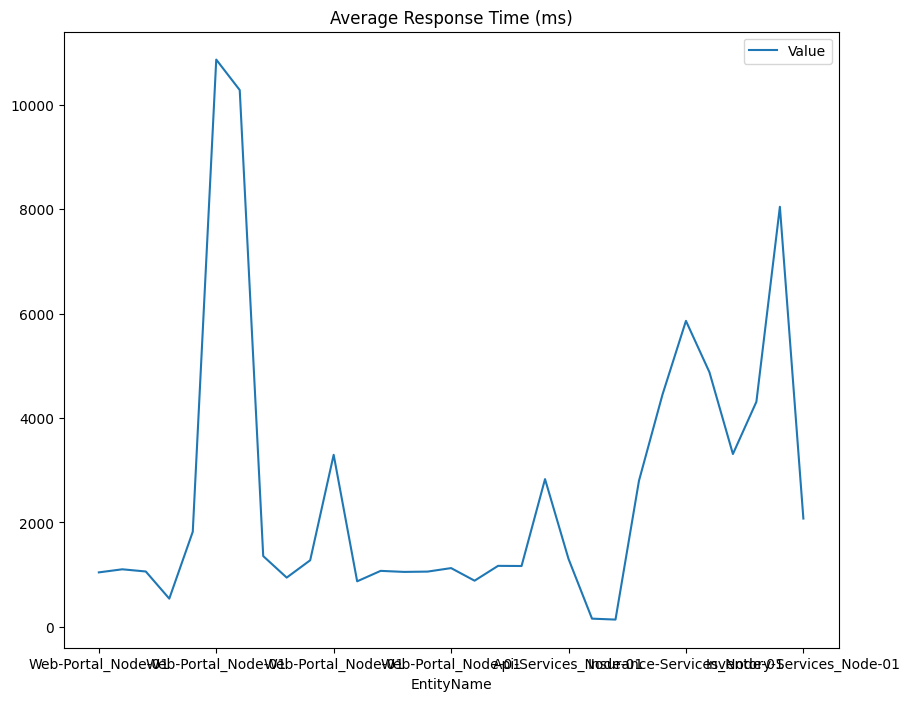

In [594]:
import matplotlib.pyplot as plt
import seaborn as sns


df['EventTime']=pd.to_datetime(df['EventTime'])
df.plot(x='EntityName', y='Value',figsize=(10,8), title=title, kind='line')

In [9]:
df.stack().head()

3  EntityName            Web-Portal_Node-01
   MetricName    Average Response Time (ms)
   EventTime            2022-07-28 00:00:00
   Value                               1043
4  EntityName            Web-Portal_Node-01
dtype: object